# Figure 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import scanpy as sc
import scirpy as ir

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import PolyCollection

## Settings

In [2]:
TEXT_WIDTH = 6.7261  # in
DPI = 360

In [3]:
def set_font_size(font_size):
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size, title_fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)   # fontsize of the figure title

In [4]:
sb.set(context='paper', style='whitegrid')
plt.rc('grid', linewidth=0.3)
sb.set_palette('colorblind')
set_font_size(6)

## Load Data

### UMAPs

In [5]:
path_ad = '../results/figX_haniffa_lv.h5ad'
adata = sc.read(path_ad)

In [6]:
palette_leiden = adata.uns['leiden_moe_cd8te_colors']
palette_leiden = dict(zip(adata.obs['leiden_moe_cd8te'].value_counts().index, palette_leiden))
palette_leiden['-99'] = 'lightgray'

In [7]:
sc.tl.rank_genes_groups(adata, groupby='Site', key_added='deg_test', n_genes=20)

In [8]:
def transform_status(name):
    if 'LPS' in name: 
        return 'LPS'
    return name

adata.obs['Status_on_day_collection_summary'] = adata.obs['Status_on_day_collection_summary'].apply(transform_status)

In [9]:
cp_ct = sb.color_palette('pastel')
cp_ct2 = sb.color_palette('bright')

palette_celltype = {
    'CD8.TE': cp_ct[3],
    'CD4.IL22': cp_ct[0],
    'CD8.Naive': cp_ct[1],
    'CD4.Naive': cp_ct[2],
    'CD8.EM': cp_ct[4],
    'CD4.CM': cp_ct[5],
    'CD4.Tfh': cp_ct[6],
    'CD4.EM': cp_ct[7],
    'CD8.Prolif': cp_ct2[0],
    'Treg': cp_ct2[1],
    'CD4.Th1': cp_ct2[2],
    'CD4.Prolif': cp_ct2[4],
    'CD4.Th2': cp_ct2[5],
    'CD4.Th17': cp_ct2[6],
}


cp_st = sb.color_palette('deep')
palette_status = {
    'Healthy': cp_st[2],
    'Asymptomatic': cp_st[8],
    'Mild': cp_st[1],
    'Moderate': cp_st[6],
    'Severe': cp_st[3],
    'Critical': cp_st[5],
    'Non_covid': cp_st[9],
    'LPS': cp_st[0],
}
order_status = palette_status.keys()
order_ct = ['CD8.Naive', 'CD8.Prolif', 'CD8.EM', 'CD8.TE', 
            'CD4.Naive', 'CD4.Prolif', 'CD4.CM', 'CD4.EM', 
            'CD4.IL22', 'CD4.Tfh', 'CD4.Th1', 'CD4.Th2', 'CD4.Th17', 'Treg']


In [10]:
palette_query = {
    'SARS-CoV': 'tab:red', 
    'Influenza': 'tab:blue', 
    'Human Herpesvirus': 'tab:green', 
    'Yellow Fever': 'tab:purple', 
    'Others': 'tab:olive',
    'No Match': 'lightgrey' 
}

In [11]:
react_leiden = adata.uns['reactive_clusters']
df_status = adata[adata.obs['leiden_moe_cd8te'].isin(react_leiden)].obs[['leiden_moe_cd8te', 
                                                                         'Status_on_day_collection_summary']]
df_status = df_status.value_counts().unstack()
df_status.head()

C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Status_on_day_collection_summary,Asymptomatic,Critical,Healthy,LPS,Mild,Moderate,Non_covid,Severe
leiden_moe_cd8te,,,,,,,,
3,NaN,49.0,NaN,1.0,28.0,829.0,NaN,160.0
5,NaN,63.0,4.0,1.0,46.0,706.0,1.0,176.0
6,1.0,79.0,7.0,1.0,216.0,397.0,3.0,285.0
12,NaN,10.0,2.0,NaN,31.0,46.0,NaN,605.0
14,1.0,1.0,3.0,NaN,3.0,637.0,1.0,7.0


In [12]:
df_disease = adata.uns['disease_by_leiden'].copy()
#df_disease = df_disease.div(df_disease.sum(axis=1), axis=0)
num_cells = adata[adata.obs['leiden_moe_cd8te'].isin(adata.uns['reactive_clusters'])
                                      ].obs['leiden_moe_cd8te'].value_counts().values
df_disease = df_disease.div(num_cells, axis=0)
df_disease['No Match'] = 1 - np.nansum(df_disease.values, axis=1)
df_disease = df_disease.replace(np.nan, 0)
df_disease.head()

C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,SARS-CoV,Influenza,Human Herpesvirus,Yellow Fever,Others,No Match
3,0.112465,0.000937,0.099344,0.002812,0.002812,0.781631
5,0.127382,0.068205,0.169509,0.092277,0.032096,0.510532
6,0.122346,0.000000,0.079879,0.026289,0.007078,0.764408
12,0.054755,0.000000,0.020173,0.011527,0.005764,0.907781
14,0.033691,0.001531,0.030628,0.006126,0.000000,0.928025


In [13]:
order_disease = ['SARS-CoV', 'Influenza', 'Human Herpesvirus', 'Yellow Fever', 'Others', 'No Match']

## Plot Image

### Umaps

In [14]:
def plot_umap(adata, grouping, ax, legend=None, ylabel=None, xlabel=None, embedding='moe', order=None):
    xy = adata.obsm[f'X_umap_{embedding}']
    colors = adata.obs[grouping].values
    
    palette = None
    if grouping == 'ifn response_score':
        palette = 'viridis'
        vmin, vmax = np.percentile(adata.obs['ifn response_score'], [1, 99])
        colors = np.clip(colors, vmin, vmax)
    if grouping == 'leiden_moe_cd8te':
        colors = [el if type(el)==str else '-99' for el in colors]
        palette = palette_leiden
    if grouping == 'full_clustering':
        palette = palette_celltype
    if grouping == 'Status_on_day_collection_summary':
        palette = palette_status
    
    plot = sb.scatterplot(x=xy[:, 0], y=xy[:, 1], ax=ax, hue=colors, 
                          s=0.05, linewidth=0, palette=palette)

    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    if legend is not None:
        pos = (1.4, 0.9)
        if legend == 'upper left':
            pos = (-0.3, 0.9)
        
        handles, labels = ax.get_legend_handles_labels()
        label_dict = dict(zip(labels, handles))
        ax.legend([label_dict[o] for o in order], order, 
                  markerscale=0.5, fontsize='xx-small', loc=legend, frameon=False,
                  bbox_to_anchor=pos, #(1.5, 0.5), 
                  bbox_transform=ax.transAxes)

    else:
        ax.legend([], [], frameon=False)
    
    if ylabel is not None:
        ax.text(0, 0.5, ylabel, size='large', weight='bold', rotation=90, 
                verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)
    if xlabel is not None:
        ax.text(0.5, 1., xlabel, size='large', weight='bold', 
                verticalalignment='bottom', horizontalalignment='center', transform=ax.transAxes)

In [15]:
def plot_umap_axis(ax, offset=0):
    ax.arrow(x=0.09-offset, y=0.07-offset, dx=0, dy=0.17, color='black', width=0.001,
             head_width=0.02, head_length=0.02, clip_on=False,
             length_includes_head=True, zorder=1, transform=ax.transAxes) 
    ax.arrow(x=0.09-offset, y=0.07-offset, dx=0.16, dy=0, color='black', width=0.001, 
             head_width=0.02, head_length=0.02, clip_on=False,
             length_includes_head=True, zorder=1, transform=ax.transAxes) 
    ax.text(0.07-offset, 0-offset, 'UMAP1', size='x-small', transform=ax.transAxes)
    ax.text(0.01-offset, 0.07-offset, 'UMAP2', size='x-small', rotation=90, transform=ax.transAxes)

In [16]:
def plot_colorbar(adata, gene, ax):
    palette = 'viridis'
    colors = adata.obs[gene].values
    
    vmin, vmax = np.percentile(adata.obs[gene], [1, 99])
    colors = np.clip(colors, vmin, vmax)
    norm = plt.Normalize(colors.min(), colors.max())
    
    sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])

    plt.colorbar(sm, label=None, cax=ax)
    ax.grid(False)
    #sb.despine(ax=ax, left=True, bottom=True)

### Other plots

In [30]:
def plot_violin(data, col, ax):
    df = data.obs[[col, 'leiden_moe_cd8te']]
    plot = sc.pl.violin(data, keys=col, groupby='leiden_moe_cd8te', size=0.1, linewidth=0.3,
                        palette=palette_leiden,
                        ax=ax, show=False)
    
    ps_ifn = data.uns['p_values_ifn']
    xticks = [el.replace('\n', ' ') for el in ps_ifn['cluster+sign'].values]
    labels = plot.set_xticklabels(xticks)
    
    for l, v in zip(labels, plot.findobj(PolyCollection)):
        if '***' in l.get_text():
            l.set_fontweight('bold')
            v.set_linewidth(0.8)
        else:
            # v.set_edgecolor('lightgrey')
            v.set_alpha(0.5)
            v.set_color('lightgrey')
    
    ax.tick_params(axis='x', labelrotation=270, labelsize='x-small')
    plot.set_ylabel('IFN Response')
    plot.set_xlabel('CD8-TE cluster')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.labelpad = 0
    ax.xaxis.labelpad = 2
    ax.tick_params(axis='y', which='major', pad=0)
    ax.tick_params(axis='x', which='major', pad=-2)

In [18]:
def plot_stacked_bar(df, title, ylabel, palette, ax, legend=False, order=None):
    df = df.div(df.sum(axis=1), axis=0)
    plot = df.plot(kind='bar', stacked=True, color=palette,  ax=ax)
    ax.set_title(title, pad=12, weight='bold')
    ax.set_xlabel('CD8-TE cluster')
    ax.set_ylabel(ylabel)
    
    if legend:
        handles, labels = ax.get_legend_handles_labels()
        label_dict = dict(zip(labels, handles))
        ax.legend([label_dict[o] for o in order], order,
                  markerscale=0.5, fontsize='x-small', ncol=len(df.columns)//2, loc='upper center', bbox_to_anchor=(0.5, 1.2),
                  frameon=False)
    else:
        ax.get_legend().remove()
    ax.tick_params(axis='x', labelrotation=0)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.yaxis.labelpad = 1
    ax.xaxis.labelpad = 1
    ax.tick_params(axis='y', which='major', pad=0)
    ax.tick_params(axis='x', which='major', pad=0)
    

In [19]:
def plot_days(data, grouping, ax):
    react_leiden = data.uns['reactive_clusters']
    df = data[data.obs['leiden_moe_cd8te'].isin(react_leiden)].obs
    plot = sb.violinplot(data=df, x='leiden_moe_cd8te', y=grouping, ax=ax, color='yellowgreen', scale='width', 
                         inner=None)
    # sb.stripplot(data=df, x='leiden_moe_cd8te', y=grouping, color='b', ax=ax, size=0.5)
    
    new_width = 0.5
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_width
        patch.set_width(new_width)
        patch.set_x(patch.get_x() + diff * .5)
    
    ax.set_title('Disease Progression', pad=0, weight='bold')
    ax.set_xlabel('CD8-TE cluster')
    ax.set_ylabel('Days from Onset')
    
    ax.tick_params(axis='x', labelrotation=0)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.yaxis.labelpad = 1
    ax.xaxis.labelpad = 1
    ax.tick_params(axis='y', which='major', pad=0)
    ax.tick_params(axis='x', which='major', pad=0)


In [20]:
def plot_degs(group, ax, left=False):
    genes = adata.uns['deg_test']['names'][group]
    scores = adata.uns['deg_test']['scores'][group]

    for i, gene in enumerate(genes):
        ax.text(i, scores[i], gene, rotation='vertical', verticalalignment='bottom', horizontalalignment='center',
            fontsize='x-small',
        )

    ymin = np.stack(adata.uns['deg_test']['scores'].tolist()).min()
    ymax = np.stack(adata.uns['deg_test']['scores'].tolist()).max()
    ymax += 0.4 * (ymax - ymin)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(-0.9, 20 - 0.1)
    ax.set_title(group, pad=0)
    
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.yaxis.labelpad = 1
    ax.tick_params(axis='y', which='major', pad=0)
    ax.set_xticks([])
    
    if left:
        ax.set_ylabel('Score')
    

In [21]:
def plot_empty(ax):
    ax.axis('off')

## Figure 

C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


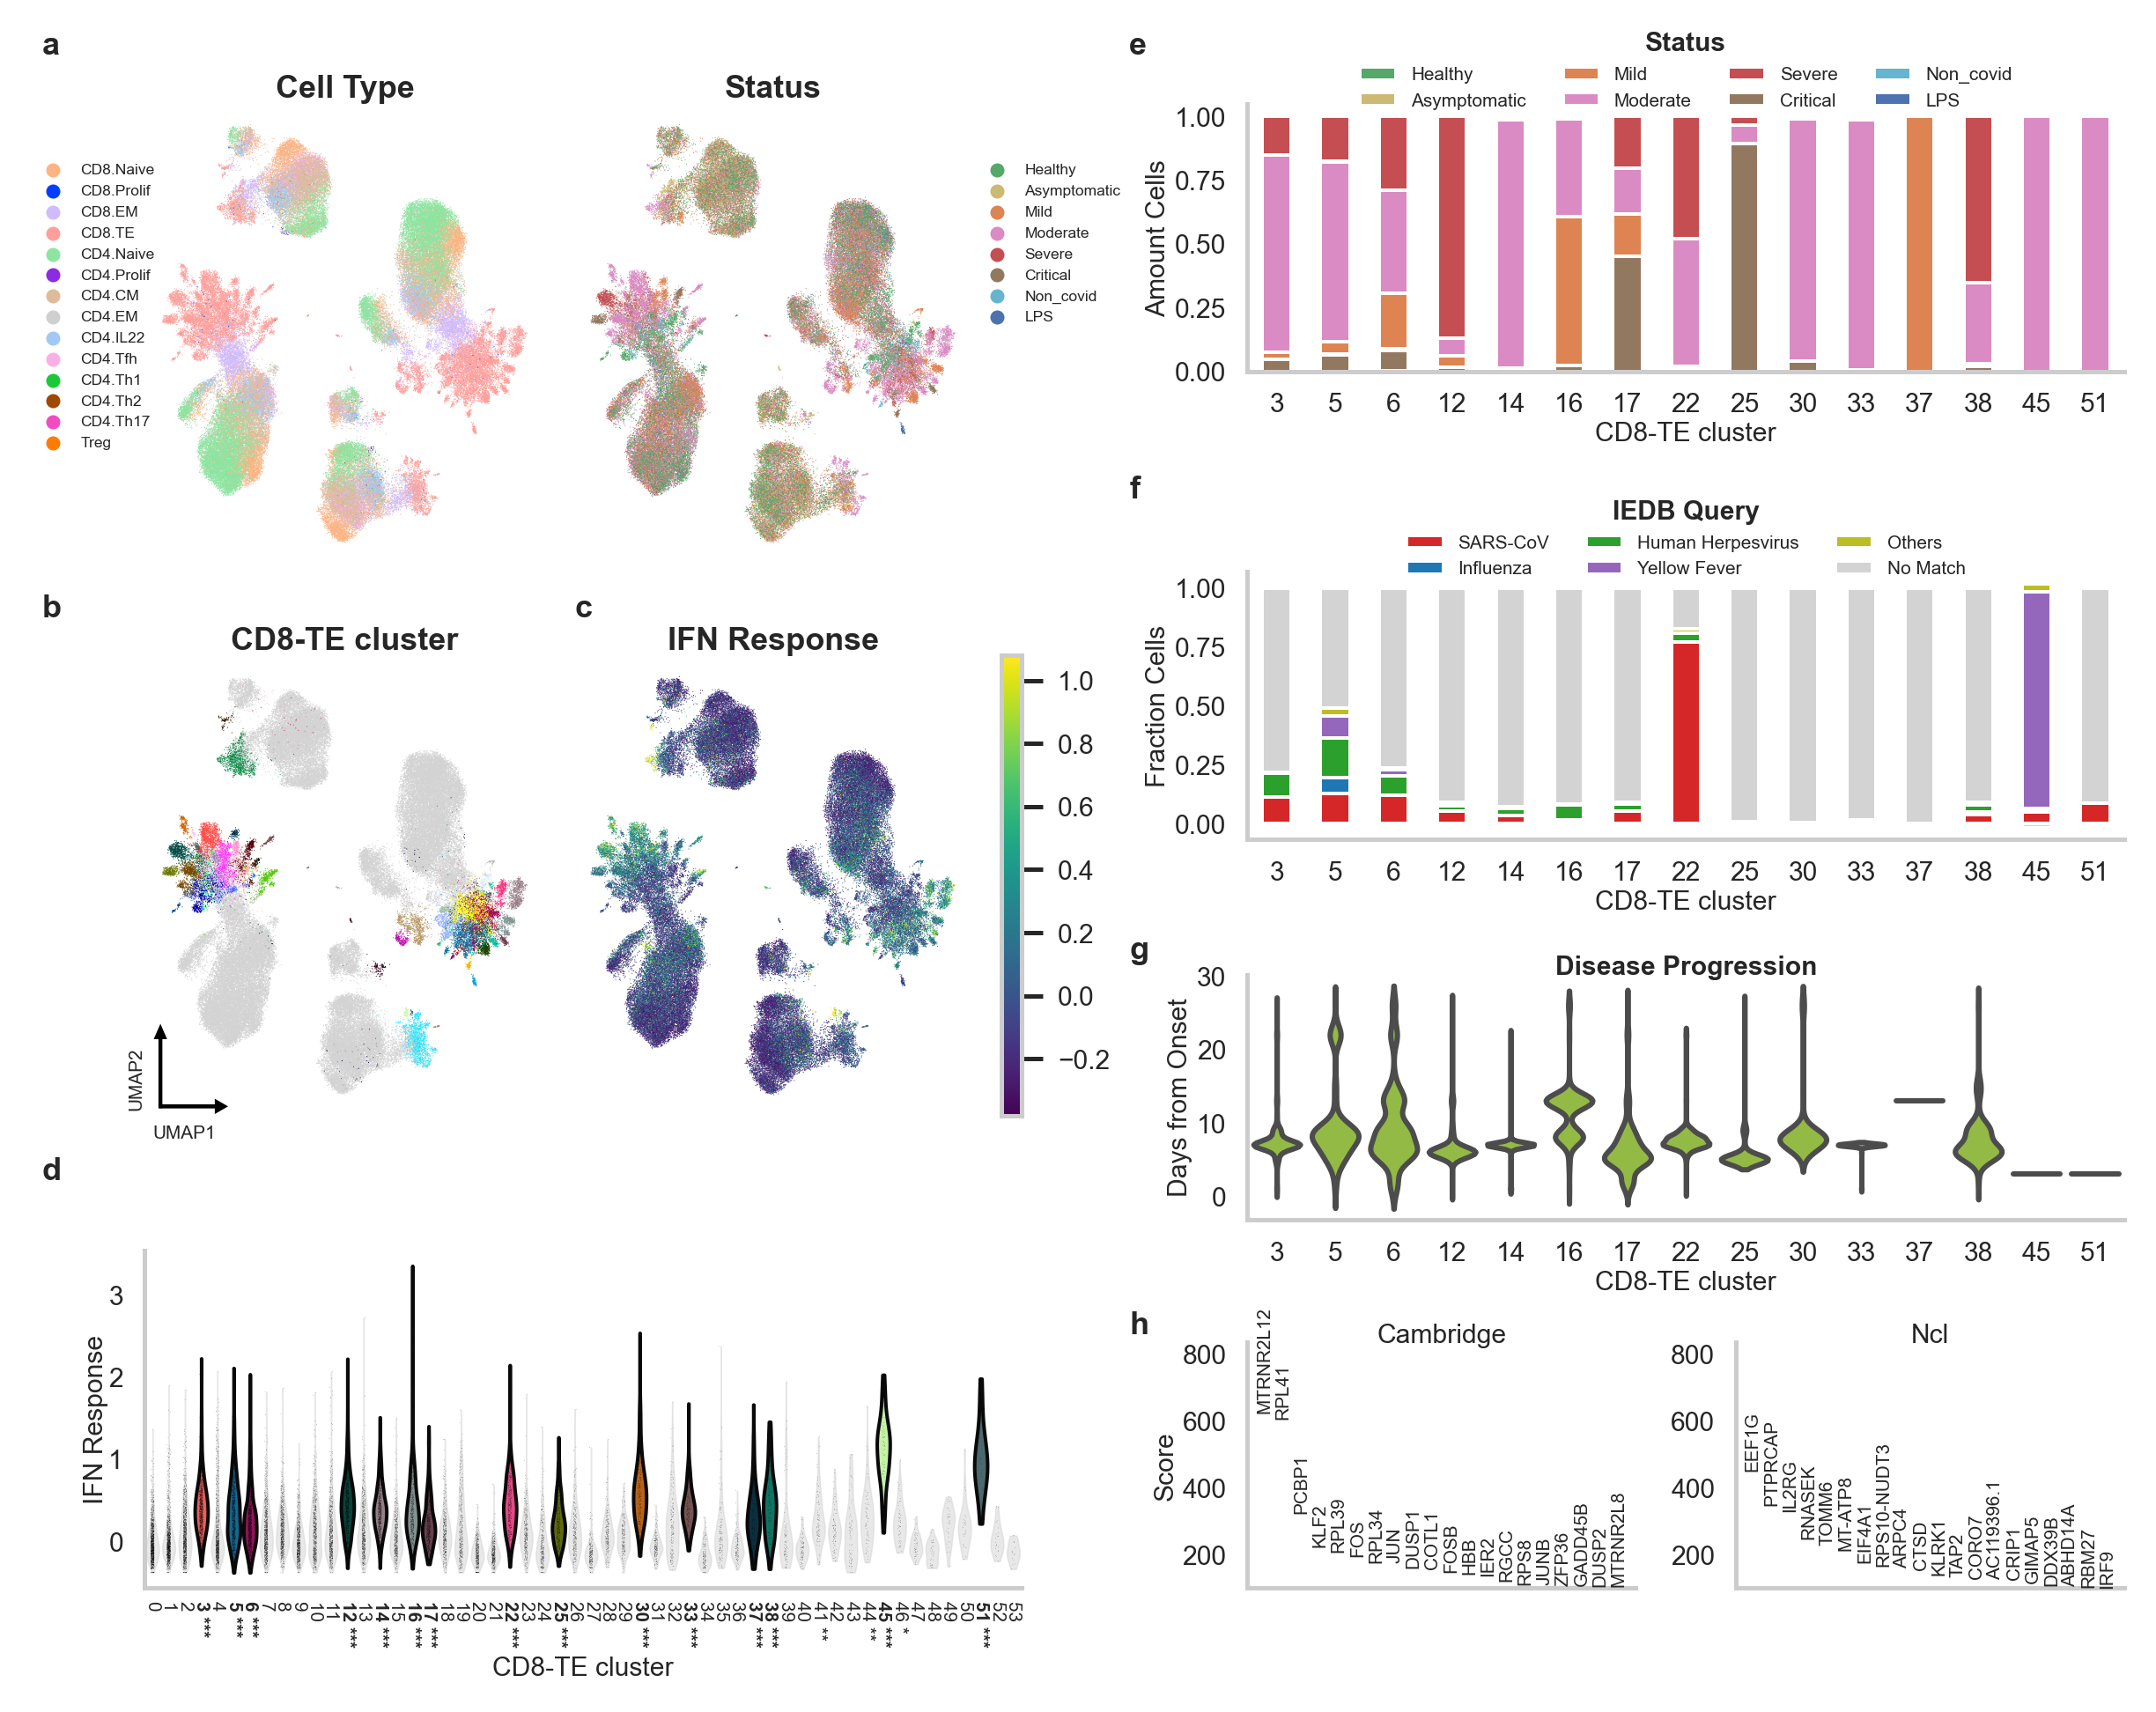

In [31]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 0.8),
                 dpi=DPI)
gridspecs = {}

#aa c
#aa d   
#b  e  
#   f

# a=UMAPs, b=violin ifn score, c=status, d=db query, e=days from onset, f=degs


gridspecs["gs_abcdef"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=1,
    ncols=2,
    height_ratios=[1],
    width_ratios=[1, 1],
    #wspace=0.1,
    #left=0.00,
    #right=1,
    #top=1,
    #bottom=0,
)

gridspecs["gs_ab"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_abcdef"][0],
    nrows=2,
    ncols=1,
    height_ratios=[3, 1],
    width_ratios=[1],
)

gridspecs["gs_a"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_ab"][0],
    nrows=2,
    ncols=3,
    height_ratios=[1, 1],
    width_ratios=[1, 1, 0.05],
    wspace=0.1
)


gridspecs["gs_cdef"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_abcdef"][1],
    nrows=2,
    ncols=1,
    height_ratios=[1.2, 1],
    width_ratios=[1],
    #hspace=0.5
)

gridspecs["gs_cd"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_cdef"][0],
    nrows=2,
    ncols=1,
    height_ratios=[1, 1],
    width_ratios=[1],
    hspace=0.75
)

gridspecs["gs_ef"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_cdef"][1],
    nrows=2,
    ncols=1,
    height_ratios=[1, 1],
    width_ratios=[1],
    hspace=0.5
)

gridspecs["gs_f"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_ef"][1],
    nrows=1,
    ncols=2,
    height_ratios=[1],
    width_ratios=[1, 1],
)

ax_a = {}
for i in range(6):
    ax_a[i] = fig.add_subplot(gridspecs["gs_a"][i])


ax_b = fig.add_subplot(gridspecs["gs_ab"][1])

ax_c = fig.add_subplot(gridspecs["gs_cd"][0])
ax_d = fig.add_subplot(gridspecs["gs_cd"][1])
ax_e = fig.add_subplot(gridspecs["gs_ef"][0])
ax_f1 = fig.add_subplot(gridspecs["gs_f"][0])
ax_f2 = fig.add_subplot(gridspecs["gs_f"][1])

plot_umap(adata, 'full_clustering', ax_a[0], xlabel='Cell Type', legend='upper left', order=order_ct)
plot_umap(adata, 'Status_on_day_collection_summary', ax_a[1], xlabel='Status', legend='upper right', order=order_status)
plot_empty(ax_a[2])

plot_umap(adata, 'leiden_moe_cd8te', ax_a[3], xlabel='CD8-TE cluster')
plot_umap(adata, 'ifn response_score', ax_a[4], xlabel='IFN Response')
plot_colorbar(adata, 'ifn response_score', ax_a[5])

plot_umap_axis(ax_a[3], offset=0.05)

plot_violin(adata, 'ifn response_score', ax_b)
plot_stacked_bar(df_status, 'Status', 'Amount Cells',  palette_status, ax_c, legend=True, order=order_status)
plot_stacked_bar(df_disease, 'IEDB Query', 'Fraction Cells', palette_query, ax_d, legend=True, order=order_disease)
plot_days(adata, 'days_from_onset_numeric', ax_e)
plot_degs('Cambridge', ax_f1, left=True)
plot_degs('Ncl', ax_f2)


fig.text(0.01, 0.97, 'a', size='large', weight='bold')
fig.text(0.01, 0.64, 'b', size='large', weight='bold')
fig.text(0.26, 0.64, 'c', size='large', weight='bold')
fig.text(0.01, 0.31, 'd', size='large', weight='bold')
fig.text(0.52, 0.97, 'e', size='large', weight='bold')
fig.text(0.52, 0.71, 'f', size='large', weight='bold')
fig.text(0.52, 0.44, 'g', size='large', weight='bold')
fig.text(0.52, 0.22, 'h', size='large', weight='bold')


fig.tight_layout()
fig.savefig('../figures/03_haniffa.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/03_haniffa.png',
           dpi=DPI, bbox_inches='tight')

## Supplementary Figure 1

C:\Users\FELIX~1.DRO\AppData\Local\Temp/ipykernel_7376/2873915410.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


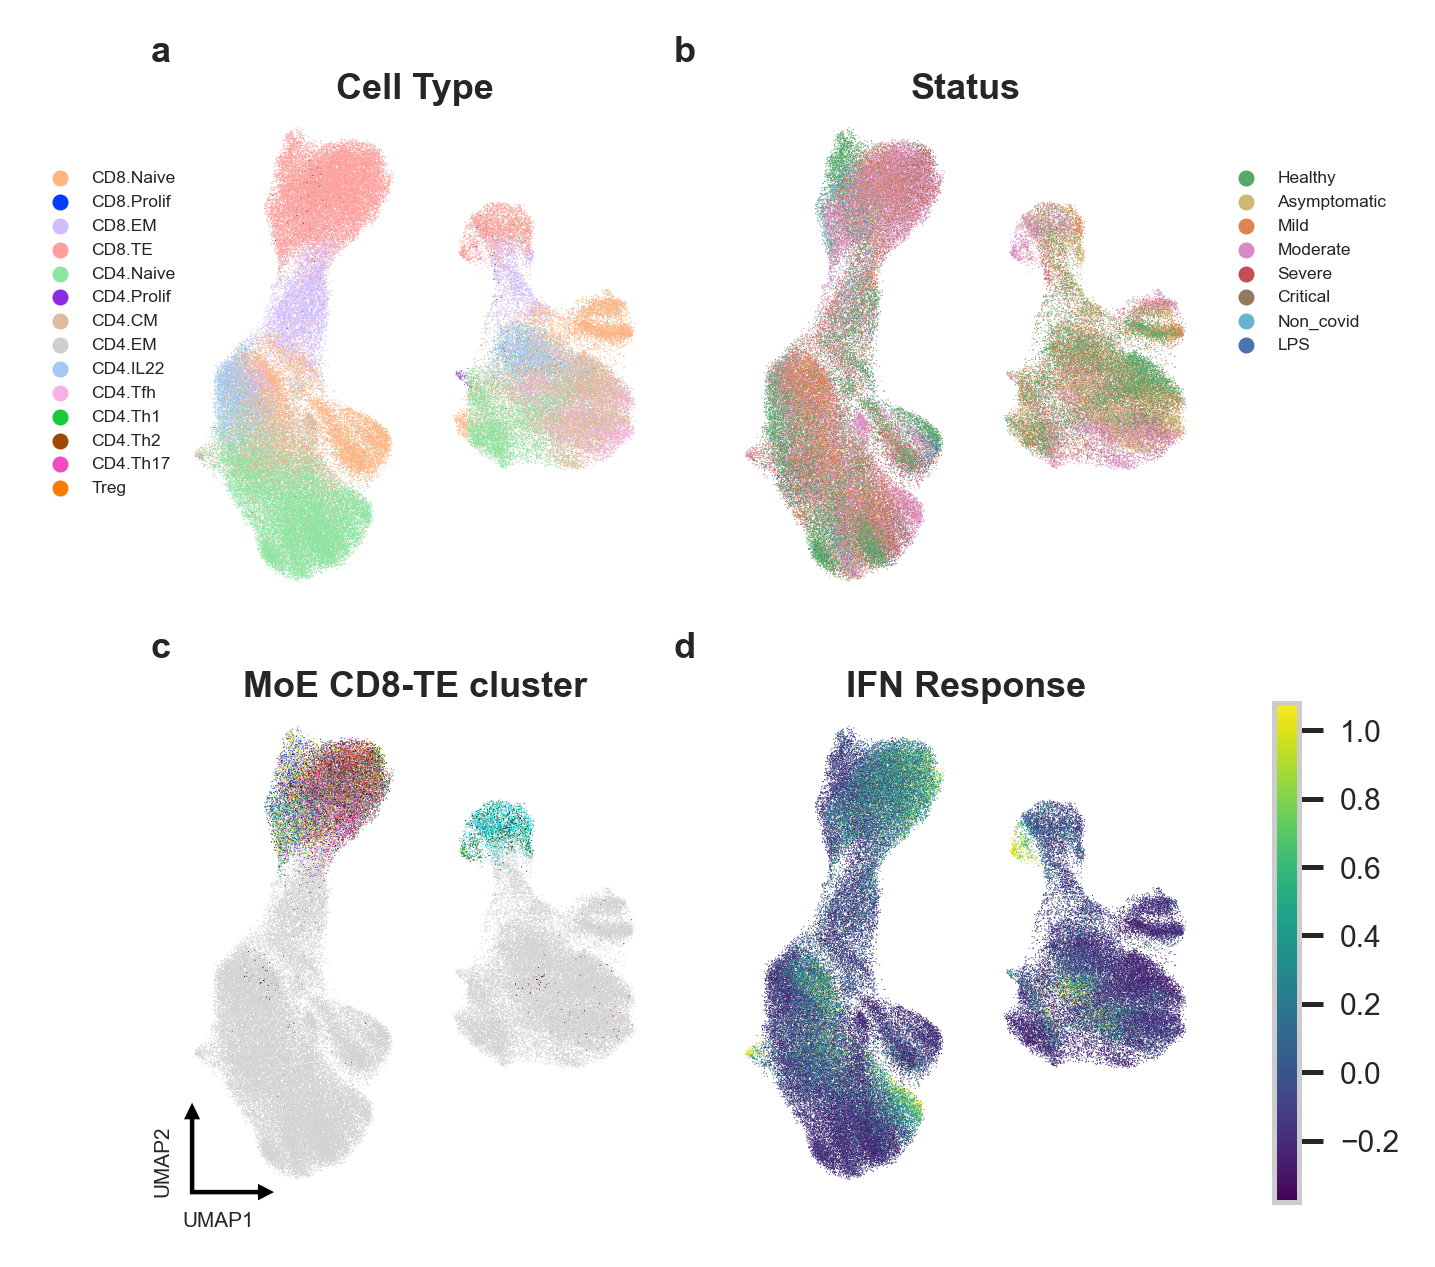

In [24]:
fig = plt.figure(figsize=(TEXT_WIDTH * 0.6, TEXT_WIDTH * 0.6),
                 dpi=DPI)
gridspecs = {}

#ab
#cd 


gridspecs["gs_a"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=3,
    height_ratios=[1, 1],
    width_ratios=[1, 1, 0.05],
    wspace=0.2
)

ax_a = {}
for i in range(6):
    ax_a[i] = fig.add_subplot(gridspecs["gs_a"][i])

    
plot_umap(adata, 'full_clustering', ax_a[0], xlabel='Cell Type', legend='upper left', order=order_ct, embedding='rna')
plot_umap(adata, 'Status_on_day_collection_summary', ax_a[1], xlabel='Status', legend='upper right', order=order_status, 
          embedding='rna')
plot_empty(ax_a[2])

plot_umap(adata, 'leiden_moe_cd8te', ax_a[3], xlabel='MoE CD8-TE cluster', embedding='rna')
plot_umap(adata, 'ifn response_score', ax_a[4], xlabel='IFN Response', embedding='rna')
plot_colorbar(adata, 'ifn response_score', ax_a[5])

plot_umap_axis(ax_a[3], offset=0.05)

fig.text(0.11, 0.91, 'a', size='large', weight='bold')
fig.text(0.47, 0.91, 'b', size='large', weight='bold')
fig.text(0.11, 0.50, 'c', size='large', weight='bold')
fig.text(0.47, 0.50, 'd', size='large', weight='bold')

fig.tight_layout()
fig.savefig('../figures/s04_haniffa.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/s04_haniffa.png',
           dpi=DPI, bbox_inches='tight')